In [2]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import glob
import os

%matplotlib inline

# Gathering Data

#Specifying folder path where all the files from 2019-2020 are stored

path =r'/Users/santhoshkm/Documents/Udacity_Data_Nano/Ford_Data' 

files = glob.glob(os.path.join(path, "*.csv"))

#Reading the content from all the files and concatenating them into a single file 

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('master_file.csv', index=False)

In [5]:
df_new = pd.read_csv('master_file.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [65]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(5)
memory usage: 286.9+ MB


In [8]:
df_new.shape

(2506983, 15)

In [9]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No,NaN
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer,No,NaN
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,No,NaN
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,No,NaN
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN


# Are there duplicated bike ids?

Yes! the bikes have been used for differnt rides. 

In [10]:
df_new[df_new.bike_id.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
35,118,2019-09-30 23:18:24.3640,2019-09-30 23:20:22.6580,76.0,McCoppin St at Valencia St,37.771662,-122.422423,75.0,Market St at Franklin St,37.773793,-122.421239,11695,Subscriber,No,NaN
37,162,2019-09-30 23:15:11.1510,2019-09-30 23:17:53.9060,98.0,Valencia St at 16th St,37.765052,-122.421866,76.0,McCoppin St at Valencia St,37.771662,-122.422423,11695,Subscriber,No,NaN
41,145,2019-09-30 23:12:34.7210,2019-09-30 23:15:00.5420,107.0,17th St at Dolores St,37.763015,-122.426497,98.0,Valencia St at 16th St,37.765052,-122.421866,11695,Subscriber,No,NaN
48,347,2019-09-30 23:02:15.0390,2019-09-30 23:08:03.0200,182.0,19th Street BART Station,37.809013,-122.268247,182.0,19th Street BART Station,37.809013,-122.268247,1715,Customer,No,NaN
72,675,2019-09-30 22:26:38.0520,2019-09-30 22:37:53.4420,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,3446,Subscriber,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506978,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,No,NaN
2506979,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,No,NaN
2506980,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,Yes,NaN
2506981,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,No,NaN


In [11]:
df_new.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

# Changing the datatypes 

User_type to 'Category' Variable, start_time and end_time to timestamps

In [12]:
df_new.user_type  = df_new.user_type.astype('category')
df_new.start_time = pd.to_datetime(df_new.start_time)
df_new.end_time = pd.to_datetime(df_new.end_time)


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
dtypes: category(1), datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 270.2+ MB


# Records where the start and end station values are null

In [14]:
df_new[df_new.start_station_id.isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
228969,1131,2019-04-29 15:30:48.389,2019-04-29 15:49:39.480,NaN,NaN,37.41,-121.95,NaN,NaN,37.42,-121.96,4106,Customer,No,NaN
229554,268,2019-04-29 13:12:08.928,2019-04-29 13:16:37.874,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.94,4106,Customer,No,NaN
232800,669,2019-04-28 23:02:16.286,2019-04-28 23:13:25.667,NaN,NaN,37.40,-121.95,NaN,NaN,37.40,-121.94,4285,Customer,No,NaN
234053,94,2019-04-28 16:30:12.368,2019-04-28 16:31:46.866,NaN,NaN,37.40,-121.95,NaN,NaN,37.40,-121.95,4285,Customer,No,NaN
235165,2389,2019-04-28 12:24:07.683,2019-04-28 13:03:57.471,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4244,Customer,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499725,1447,2019-02-02 12:03:04.544,2019-02-02 12:27:12.267,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,No,NaN
2503301,309,2019-02-01 12:59:45.969,2019-02-01 13:04:55.426,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,No,NaN
2503541,659,2019-02-01 12:17:37.675,2019-02-01 12:28:37.014,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,No,NaN
2503677,2013,2019-02-01 11:33:55.147,2019-02-01 12:07:28.940,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,No,NaN


# What is the minimum and maximum starting time of the rides? (Timestamp)

In [15]:
df_new.start_time.sort_values()

1748077   2019-01-01 00:07:10.576
1748049   2019-01-01 00:08:39.659
1748076   2019-01-01 00:09:56.211
1748075   2019-01-01 00:11:03.441
1748071   2019-01-01 00:14:48.398
                    ...          
1987999   2019-12-31 23:56:34.462
1987998   2019-12-31 23:56:40.324
1988003   2019-12-31 23:57:01.551
1987996   2019-12-31 23:59:37.206
2123335   2019-12-31 23:59:41.000
Name: start_time, Length: 2506983, dtype: datetime64[ns]

# Different Start and End stations

In [16]:
df_new.start_station_name.value_counts()

Market St at 10th St                                         45058
Berry St at 4th St                                           42962
San Francisco Caltrain (Townsend St at 4th St)               40302
San Francisco Ferry Building (Harry Bridges Plaza)           39016
San Francisco Caltrain Station 2  (Townsend St at 4th St)    36576
                                                             ...  
Prototype Lab                                                    4
San Jose Depot                                                   3
Mercado Way at Sierra Rd                                         3
Philly Demo                                                      2
SF Test Station                                                  1
Name: start_station_name, Length: 446, dtype: int64

In [17]:
df_new.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    52146
San Francisco Caltrain (Townsend St at 4th St)               50943
San Francisco Ferry Building (Harry Bridges Plaza)           48180
Montgomery St BART Station (Market St at 2nd St)             47886
Market St at 10th St                                         44284
                                                             ...  
Howard workshop - Station in a Box                               4
Prototype Lab                                                    4
San Jose Depot                                                   2
Philly Demo                                                      2
Emeryville Depot                                                 1
Name: end_station_name, Length: 446, dtype: int64

# Who are the different user types?

In [18]:
df_new.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [19]:
df_new.shape

(2506983, 15)

# What are the different rental access methods?

In [20]:
df_new.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

# Maximum and Minimum duration of rides in general

In [21]:
df_new.duration_sec.min()

60

In [22]:
df_new.duration_sec.max()

912110

# What rental_access_methods do Customer and Subcribers use? 

Do they use both app and clipper?

It is to be noted that some of the records for customer and subscriber have null values in them. 

In [23]:
(df_new[(df_new.user_type == 'Customer') & (df_new.rental_access_method.notnull())].rental_access_method).value_counts()

app        13479
clipper     1018
Name: rental_access_method, dtype: int64

In [24]:
(df_new[(df_new.user_type == 'Subscriber') & (df_new.rental_access_method.notnull())].rental_access_method).value_counts()

app        94531
clipper    11810
Name: rental_access_method, dtype: int64

# Does the Customer or Subscriber share trips? 

Analyzing the bike_share_for_all_trip variable in relation to the User_type - Customer and Subscriber

In [25]:
df_new[(df_new.user_type == 'Customer') & (df_new.bike_share_for_all_trip == 'Yes')]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method


In [26]:
df_new[(df_new.user_type == 'Subscriber') & (df_new.bike_share_for_all_trip == 'Yes')]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
11,218,2019-09-30 23:45:48.340,2019-09-30 23:49:27.250,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,88.0,11th St at Bryant St,37.770030,-122.411726,12415,Subscriber,Yes,NaN
34,758,2019-09-30 23:07:49.469,2019-09-30 23:20:28.048,47.0,4th St at Harrison St,37.780955,-122.399749,10.0,Washington St at Kearny St,37.795393,-122.404770,1031,Subscriber,Yes,NaN
38,559,2019-09-30 23:08:18.298,2019-09-30 23:17:38.171,270.0,Ninth St at Heinz Ave,37.853489,-122.289415,152.0,47th St at San Pablo Ave,37.835632,-122.281051,10105,Subscriber,Yes,NaN
40,773,2019-09-30 23:03:01.365,2019-09-30 23:15:54.863,341.0,Fountain Alley at S 2nd St,37.336188,-121.889277,296.0,5th St at Virginia St,37.325998,-121.877120,11408,Subscriber,Yes,NaN
54,347,2019-09-30 22:52:57.720,2019-09-30 22:58:44.990,35.0,Cahill Park,37.329119,-121.904576,426.0,San Carlos St at Meridian Ave,37.323345,-121.913497,12880,Subscriber,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506966,95,2019-02-01 00:37:23.115,2019-02-01 00:38:58.346,276.0,Julian St at The Alameda,37.332233,-121.912516,277.0,Morrison Ave at Julian St,37.333658,-121.908586,4299,Subscriber,Yes,NaN
2506967,576,2019-02-01 00:27:06.503,2019-02-01 00:36:43.452,181.0,Grand Ave at Webster St,37.811377,-122.265192,212.0,Mosswood Park,37.824893,-122.260437,3561,Subscriber,Yes,NaN
2506972,383,2019-02-01 00:16:48.062,2019-02-01 00:23:11.201,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,181.0,Grand Ave at Webster St,37.811377,-122.265192,4505,Subscriber,Yes,NaN
2506975,256,2019-02-01 00:12:50.554,2019-02-01 00:17:07.362,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,Yes,NaN


In [27]:
df_new[(df_new.user_type == 'Subscriber') & (df_new.bike_share_for_all_trip == 'No')]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
4,1272,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN
6,644,2019-09-30 23:54:43.104,2019-10-01 00:05:27.656,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,91.0,Berry St at King St,37.771762,-122.398438,9963,Subscriber,No,NaN
7,459,2019-09-30 23:54:42.865,2019-10-01 00:02:22.363,321.0,5th St at Folsom,37.780146,-122.403071,77.0,11th St at Natoma St,37.773507,-122.416040,531,Subscriber,No,NaN
8,625,2019-09-30 23:49:31.705,2019-09-30 23:59:56.916,16.0,Steuart St at Market St,37.794130,-122.394430,80.0,Townsend St at 5th St,37.775235,-122.397437,10906,Subscriber,No,NaN
12,471,2019-09-30 23:40:50.964,2019-09-30 23:48:42.491,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,262.0,West St at University Ave,37.869967,-122.286533,12980,Subscriber,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506977,706,2019-02-01 00:04:40.616,2019-02-01 00:16:27.080,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,No,NaN
2506978,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,No,NaN
2506979,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,No,NaN
2506981,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,No,NaN


# Minimum and Maximum Duration of ride for Customer and Subscriber

In [28]:
df_new[(df_new.user_type == 'Customer')].duration_sec.min()

60

In [29]:
df_new[(df_new.user_type == 'Customer')].duration_sec.max()

912110

In [30]:
df_new[(df_new.user_type == 'Subscriber')].duration_sec.min()

60

In [31]:
df_new[(df_new.user_type == 'Subscriber')].duration_sec.max()

86114

# Start hour, start day, start month splitting


In [32]:
df_new['start_date'] = df_new.start_time.dt.strftime('%Y-%m-%d')
df_new['start_hour_day'] = df_new.start_time.dt.strftime('%H')
df_new['start_day_week'] = df_new.start_time.dt.strftime('%A')
df_new['start_month'] =  df_new.start_time.dt.strftime('%B')
df_new['year'] = df_new.start_time.dt.strftime('%Y')

In [33]:
df_new

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_date,start_hour_day,start_day_week,start_month,year
0,60863,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No,NaN,2019-09-30,11,Monday,September,2019
1,36019,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer,No,NaN,2019-09-30,16,Monday,September,2019
2,5615,2019-09-30 23:12:25.998,2019-10-01 00:46:01.959,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,No,NaN,2019-09-30,23,Monday,September,2019
3,1482,2019-09-30 23:57:34.663,2019-10-01 00:22:16.849,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,No,NaN,2019-09-30,23,Monday,September,2019
4,1272,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN,2019-09-30,23,Monday,September,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506978,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,No,NaN,2019-02-01,00,Friday,February,2019
2506979,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,No,NaN,2019-02-01,00,Friday,February,2019
2506980,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,Yes,NaN,2019-02-01,00,Friday,February,2019
2506981,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,No,NaN,2019-02-01,00,Friday,February,2019


In [34]:
df_new.year.value_counts()

2019    2506983
Name: year, dtype: int64

In [35]:
df_new.shape

(2506983, 20)

# Structure of the Dataset


The dataset has a total of 3411990 records. There are a total of 15 columns 

 0   duration_sec             int64  
 
 1   start_time               datetime 
 
 2   end_time                 datetime 
 
 3   start_station_id         float64
 
 4   start_station_name       object 
 
 5   start_station_latitude   float64
 
 6   start_station_longitude  float64
 
 7   end_station_id           float64
 
 8   end_station_name         object 
 
 9   end_station_latitude     float64
 
 10  end_station_longitude    float64
 
 11  bike_id                  int64  
 
 12  user_type                category
 
 13  bike_share_for_all_trip  object 
 
 
 14  rental_access_method     object 
 
 



# Visualizations 

# Total duration in seconds of usage of the bike sharing system by Customer and Subscriber in 2019

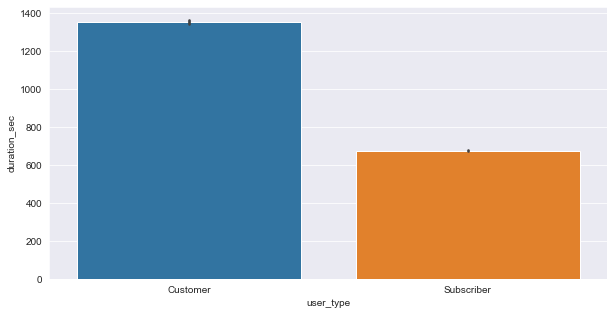

In [40]:
sb.barplot(x='user_type', y='duration_sec', data=df_new)

# Which rental access method do the bike sharing system users use the most?

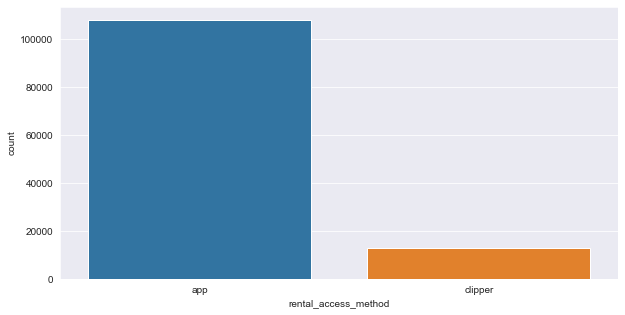

In [63]:
sb.countplot(x='rental_access_method', data=df_new)

# Most commonly used start_station, which start_station has high demand, which days of the week see the most demand?

In [44]:
df_new.start_station_id.value_counts(sort=True)

58.0     45058
81.0     42962
30.0     40302
15.0     39016
67.0     36576
         ...  
429.0        4
329.0        3
444.0        3
484.0        2
420.0        1
Name: start_station_id, Length: 436, dtype: int64

In [49]:
df_max_station = df_new[df_new.start_station_id == 58.0]

In [51]:
df_max_station

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_date,start_hour_day,start_day_week,start_month,year
59,372,2019-09-30 22:44:23.120,2019-09-30 22:50:35.514,58.0,Market St at 10th St,37.776619,-122.417385,368.0,Myrtle St at Polk St,37.785434,-122.419622,12931,Subscriber,No,NaN,2019-09-30,22,Monday,September,2019
134,580,2019-09-30 21:52:10.737,2019-09-30 22:01:50.748,58.0,Market St at 10th St,37.776619,-122.417385,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,2691,Subscriber,No,NaN,2019-09-30,21,Monday,September,2019
240,742,2019-09-30 21:10:18.620,2019-09-30 21:22:40.932,58.0,Market St at 10th St,37.776619,-122.417385,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3421,Subscriber,No,NaN,2019-09-30,21,Monday,September,2019
244,557,2019-09-30 21:12:48.721,2019-09-30 21:22:06.393,58.0,Market St at 10th St,37.776619,-122.417385,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,2299,Subscriber,No,NaN,2019-09-30,21,Monday,September,2019
262,582,2019-09-30 21:07:34.724,2019-09-30 21:17:17.192,58.0,Market St at 10th St,37.776619,-122.417385,365.0,Turk St at Fillmore St,37.780450,-122.431946,48,Subscriber,No,NaN,2019-09-30,21,Monday,September,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506933,899,2019-02-01 01:08:39.015,2019-02-01 01:23:38.798,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,-122.420975,2033,Subscriber,No,NaN,2019-02-01,01,Friday,February,2019
2506935,892,2019-02-01 01:08:43.731,2019-02-01 01:23:35.763,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,-122.420975,3392,Subscriber,No,NaN,2019-02-01,01,Friday,February,2019
2506936,932,2019-02-01 01:07:51.908,2019-02-01 01:23:24.370,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,-122.420975,4962,Subscriber,No,NaN,2019-02-01,01,Friday,February,2019
2506937,932,2019-02-01 01:07:49.971,2019-02-01 01:23:22.528,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,-122.420975,5382,Subscriber,No,NaN,2019-02-01,01,Friday,February,2019


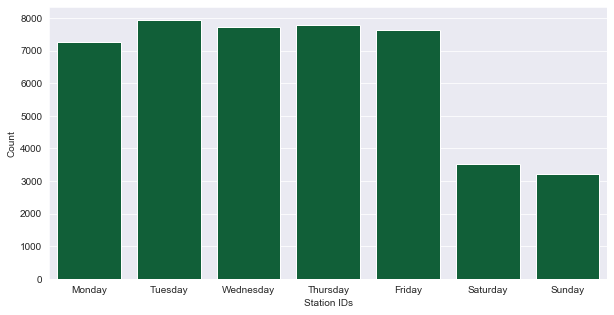

In [52]:
plt.rcParams['figure.figsize'] = 10, 5
base_color = sb.color_palette('YlGn_r')[0]
sb.set_style('darkgrid')

sb.countplot(data=df_max_station, x='start_day_week', color=base_color);
plt.xlabel('Station IDs');
plt.ylabel('Count');

So, as per this graph, we can see that for the start_station_id - 58.0 -> Market St at 10th St, while plotting the demand across weeks, we can see that the demand is high on Tuesdays and least on Sundays

# Number of trips taken by Customers and Subscribers every month

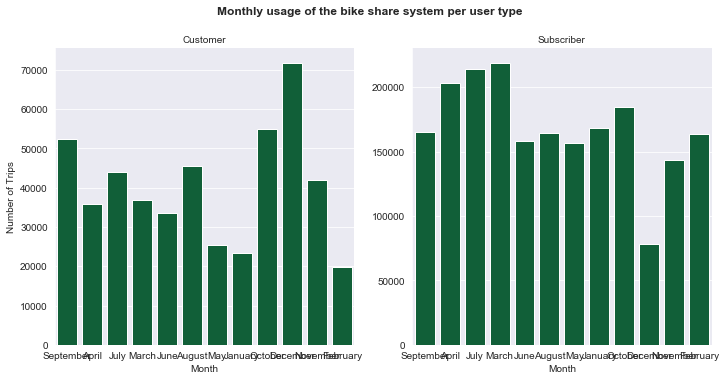

In [55]:
# Analysis of the number of trips taken by different user types across months in a year

g = sb.catplot(data=df_new, x='start_month', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Month", "Number of Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.05, fontsize=12, fontweight='semibold');


So in 2019, the number of customers who used bike sharing was less than the number of Subscribers who used bike sharing. 

For Customers, the peak time seems to be during the month of December, while for Subscribers the peak times seem to be during the months of March and July - Again it can be noted that this corelates with the monthly usage data in 2019 where the usage was high in the months March and July

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest

My analysis was mostly focussed on understanding factors influencing bike sharing system usage in the year 2019. Some of the relationships that I observed as part of this investigation were the relationship between user_types and the number of trips taken by each user type, the user_type and the type of rental access method used by them. I also explored the data to understand which station id had high demand, I also analysed the relationship between the station_id with the highest demand and the day of week that it received such high demand. 

# Were there any interesting or surprising interactions between features?
Yes, there are many interesting interactions between features in this dataset, for example for the station_id with the highest demand, we can find which hour of the day does this station_id see the highest and lowest demand, we can also draw some relationship between the station_id with the lowest demand to determine if that is a viable station to still keep basically this can help make business decisions about whether to keep that station or lose it to gain a different one that helps business. 
